In [1]:
import pandas as pd
from pandas.plotting import table
import requests
import json
from config import key, bkey
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cbook, ticker, units
import datetime
import functools
import re

## US Census Data API

In [2]:
census = pd.read_html('https://api.census.gov/data.html')[0]

In [3]:
list(census["Title"])

['1986 County Business Patterns: Business Patterns',
 '1987 County Business Patterns: Business Patterns',
 '1988 County Business Patterns: Business Patterns',
 '1989 County Business Patterns: Business Patterns',
 '1990 County Business Patterns: Business Patterns',
 '1990 Population Estimates - 1990-2000 Intercensal Estimates: County Estimates by 5 Year Age Groups, Race by Sex, and Hispanic Origin',
 '1990 Population Estimates - 1990-2000 Intercensal Estimates: United States Civilian Population Estimates by Age and Sex',
 '1990 Population Estimates - 1990-2000 Intercensal Estimates: United States Resident plus Armed Forces Overseas Population Estimates by Age and Sex',
 '1990 Population Estimates - 1990-2000 Intercensal Estimates: United States Resident Population Estimates by Age and Sex',
 '1991 County Business Patterns: Business Patterns',
 '1992 County Business Patterns: Business Patterns',
 '1993 County Business Patterns: Business Patterns',
 '1994 County Business Patterns: Busines

### International Trade

In [4]:
trade_census = census[census["Title"].str.contains("International Trade")]
pd.set_option('display.max_colwidth', None)
trade_census

,Title,Description,Vintage,Dataset Name,Dataset Type,Geography List,Variable List,Group List,Examples,Developer Documentation,API Base URL
306,2014 International Trade: Historical Imports and Exports,"This international trade file provides the annual dollar value of U.S. exports and imports of goods for all U.S. trade partners. It also provides the annual dollar value of U.S. exports and imports of manufactured goods for all U.S. trade partners. You can find this data and more by going to usatrade.census.gov. If you have any questions regarding U.S. international trade data, please call us at 1(800)549-0595 option #4 or email us at eid.international.trade.data@census.gov.",2014,intltrade› imp_exp,Aggregate,geographies,variables,groups,examples,documentation,https://api.census.gov/data/2014/intltrade/imp_exp
352,2015 International Trade: Historical Imports and Exports,"This international trade file provides the annual dollar value of U.S. exports and imports of goods for all U.S. trade partners. It also provides the annual dollar value of U.S. exports and imports of manufactured goods for all U.S. trade partners. You can find this data and more by going to usatrade.census.gov. If you have any questions regarding U.S. international trade data, please call us at 1(800)549-0595 option #4 or email us at eid.international.trade.data@census.gov.",2015,intltrade› imp_exp,Aggregate,geographies,variables,groups,examples,documentation,https://api.census.gov/data/2015/intltrade/imp_exp
378,2016 International Trade: Historical Imports and Exports,"This international trade file provides the annual dollar value of U.S. exports and imports of goods for all U.S. trade partners. It also provides the annual dollar value of U.S. exports and imports of manufactured goods for all U.S. trade partners. You can find this data and more by going to usatrade.census.gov. If you have any questions regarding U.S. international trade data, please call us at 1(800)549-0595 option #4 or email us at eid.international.trade.data@census.gov.",2016,intltrade› imp_exp,Aggregate,geographies,variables,groups,examples,documentation,https://api.census.gov/data/2016/intltrade/imp_exp
461,2017 International Trade: Historical Imports and Exports,"This international trade file provides the annual dollar value of U.S. exports and imports of goods for all U.S. trade partners. It also provides the annual dollar value of U.S. exports and imports of manufactured goods for all U.S. trade partners. You can find this data and more by going to usatrade.census.gov. If you have any questions regarding U.S. international trade data, please call us at 1(800)549-0595 option #4 or email us at eid.international.trade.data@census.gov.",2017,intltrade› imp_exp,Aggregate,geographies,variables,groups,examples,documentation,https://api.census.gov/data/2017/intltrade/imp_exp
492,2018 International Trade: Historical Imports and Exports,"This international trade file provides the annual dollar value of U.S. exports and imports of goods for all U.S. trade partners. It also provides the annual dollar value of U.S. exports and imports of manufactured goods for all U.S. trade partners. You can find this data and more by going to usatrade.census.gov. If you have any questions regarding U.S. international trade data, please call us at 1(800)549-0595 option #4 or email us at eid.international.trade.data@census.gov.",2018,intltrade› imp_exp,Aggregate,geographies,variables,groups,examples,documentation,https://api.census.gov/data/2018/intltrade/imp_exp
537,Time Series Economic Indicators Time Series -: U.S. International Trade in Goods and Services,"The U.S. Census Bureau.s economic indicator surveys provide monthly and quarterly data that are timely, reliable, and offer comprehensive measures of the U.S. economy. These surveys produce a variety of statistics covering construction, housing, international trade, retail trade, wholesale trade, services and manufacturing. The survey data provide measures of 

# Import

### Time Series International Trade: Monthly U.S. Imports by Port and Harmonized System (HS) Code<br>
The Port HS endpoint in the Census data API also provides value, shipping weight, and method of transportation totals at the port level for all U.S. trading partners. The Census data API will help users research new markets for their products, establish pricing structures for potential export markets, and conduct economic planning.

#### Variables

In [5]:
portVar = pd.read_html('https://api.census.gov/data/timeseries/intltrade/imports/porths/variables.html')[0]
portVar

,Name,Label,Concept,Required,Attributes,Limit,Predicate Type,Group,Unnamed: 8
0,AIR_VAL_MO,15-digit Air Value,Measures,not required,NaN,0,int,NaN,NaN
1,AIR_VAL_YR,15-digit Year-to-Date Air Value,Measures,not required,NaN,0,int,NaN,NaN
2,AIR_WGT_MO,15-digit Air Shipping Weight,Measures,not required,NaN,0,int,NaN,NaN
3,AIR_WGT_YR,15-digit Year-to-Date Air Shipping Weight,Measures,not required,NaN,0,int,NaN,NaN
4,CNT_VAL_MO,15-digit Containerized Vessel Value,Measures,not required,NaN,0,int,NaN,NaN
5,CNT_VAL_YR,15-digit Year-to-Date Containerized Vessel Value,Measures,not required,NaN,0,int,NaN,NaN
6,CNT_WGT_MO,15-digit Containerized Vessel Shipping Weight,Measures,not required,NaN,0,int,NaN,NaN
7,CNT_WGT_YR,15-digit Year-to-Date Containerized Vessel Shipping Weight,Measures,not required,NaN,0,int,NaN,NaN
8,COMM_LVL,4-character aggregation levels for commodity code. HS2=2-digit HS totals. HS4=4-digit HS totals. HS6=6-digit HS totals.,Measures,not required,NaN,0,string,NaN,NaN
9,CTY_CODE,4-character Country Code,Measures,default displayed,NaN,0,string,NaN,NaN


In [7]:
portDict = dict(zip(portVar["Name"], portVar["Label"].str.replace('15-digit ', '')))

## Port and Container Count

In [41]:
portURL = 'https://api.census.gov/data/timeseries/intltrade/imports/porths?get='
portURLreq = requests.get(f"{portURL}PORT,PORT_NAME,CNT_WGT_MO&time=from+2019+to+2021&key={key}")
print(portURLreq.url)

https://api.census.gov/data/timeseries/intltrade/imports/porths?get=PORT,PORT_NAME,CNT_WGT_MO&time=from+2019+to+2021&key=c140aee8a215a9f809ef67c3c758614e79362587


In [42]:
portData = portURLreq.json()
portDF = pd.DataFrame(portData, columns=portData[0]).drop([0]).rename(columns=portDict)
pd.set_option('display.max_colwidth', None)
portDF

,4-character Port Code,150-character Port Name,Containerized Vessel Shipping Weight,ISO-8601 Date/Time value
1,-,TOTAL FOR ALL PORTS,15840254477,2019-01
2,-,TOTAL FOR ALL PORTS,13329969180,2019-02
3,-,TOTAL FOR ALL PORTS,14054279566,2019-03
4,-,TOTAL FOR ALL PORTS,14721360090,2019-04
5,-,TOTAL FOR ALL PORTS,15441730719,2019-05
...,...,...,...,...
9367,2401,"YSLETA, TX",0,2020-11
9368,2401,"YSLETA, TX",0,2020-12
9369,2401,"YSLETA, TX",0,2021-01
9370,2401,"YSLETA, TX",0,2021-02


In [43]:
port = portDF[~portDF['150-character Port Name'].str.contains("TOTAL")].drop(columns=['4-character Port Code']).rename(columns={'150-character Port Name':'Port','ISO-8601 Date/Time value':'Date'})
#port['Date'] = pd.to_datetime(port['Date'])
port.head()

,Port,Containerized Vessel Shipping Weight,Date
28,"PORTLAND, ME",8582227,2019-01
29,"PORTLAND, ME",14823829,2019-02
30,"PORTLAND, ME",12000667,2019-03
31,"PORTLAND, ME",19453602,2019-04
32,"PORTLAND, ME",14481568,2019-05


In [44]:
port.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9344 entries, 28 to 9371
Data columns (total 3 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Port                                  9344 non-null   object
 1   Containerized Vessel Shipping Weight  9344 non-null   object
 2   Date                                  9344 non-null   object
dtypes: object(3)
memory usage: 292.0+ KB


In [45]:
portCOL = port.columns.drop(['Port',"Date"])
port[portCOL] = port[portCOL].apply(pd.to_numeric, errors='coerce')

In [46]:
port.head()

,Port,Containerized Vessel Shipping Weight,Date
28,"PORTLAND, ME",8582227,2019-01
29,"PORTLAND, ME",14823829,2019-02
30,"PORTLAND, ME",12000667,2019-03
31,"PORTLAND, ME",19453602,2019-04
32,"PORTLAND, ME",14481568,2019-05


Consolidate Port by State

In [47]:
list(port['Port'].unique())

['PORTLAND, ME',
 'BANGOR, ME',
 'EASTPORT, ME',
 'JACKMAN, ME',
 'VANCEBORO, ME',
 'HOULTON, ME',
 'FORT FAIRFIELD, ME',
 'VAN BUREN, ME',
 'MADAWASKA, ME',
 'FORT KENT, ME',
 'BATH, ME',
 'BAR HARBOR, ME',
 'CALAIS, ME',
 'LIMESTONE, ME',
 'ROCKLAND, ME',
 'JONESPORT, ME',
 'BRIDGEWATER, ME',
 'PORTSMOUTH, NH',
 'BELFAST, ME',
 'SEARSPORT, ME',
 'MANCHESTER USER FEE AIRPORT, NH',
 'ST. ALBANS, VT',
 'RICHFORD, VT',
 'BEECHER FALLS, VT',
 'BURLINGTON, VT',
 'DERBY LINE, VT',
 'NORTON, VT',
 'HIGHGATE SPRINGS-ALBURG, VT',
 'BOSTON, MA',
 'SPRINGFIELD, MA',
 'WORCESTER, MA',
 'GLOUCESTER, MA',
 'NEW BEDFORD, MA',
 'PLYMOUTH, MA',
 'FALL RIVER, MA',
 'SALEM, MA',
 'BRIDGEPORT, CT',
 'HARTFORD, CT',
 'NEW HAVEN, CT',
 'NEW LONDON, CT',
 'LAWRENCE, MA',
 'LOGAN AIRPORT, MA',
 'L.G. HANSCOM FIELD, BEDFORD, MA',
 'NEWPORT, RI',
 'PROVIDENCE, RI',
 'OGDENSBURG, NY',
 'MASSENA, NY',
 'ALEXANDRIA BAY, NY',
 'CHAMPLAIN-ROUSES POINT, NY',
 'TROUT RIVER, NY',
 'BUFFALO-NIAGARA FALLS, NY',
 'ROCHES

In [48]:
portST = port.copy()
portST['Port State'] = port['Port'].str[-2:]

In [49]:
portST.head()

,Port,Containerized Vessel Shipping Weight,Date,Port State
28,"PORTLAND, ME",8582227,2019-01,ME
29,"PORTLAND, ME",14823829,2019-02,ME
30,"PORTLAND, ME",12000667,2019-03,ME
31,"PORTLAND, ME",19453602,2019-04,ME
32,"PORTLAND, ME",14481568,2019-05,ME


In [50]:
portST = portST.groupby(['Date','Port State']).sum().reset_index().rename(columns={'Containerized Vessel Shipping Weight':'Weight'})
portCT = port.groupby(['Date','Port']).sum().rename(columns={'Containerized Vessel Shipping Weight':'Weight'})
portCT

Weight
Date    Port                                  
2019-01 ABERDEEN-HOQUIAM, WA             56832
        ADDISON AIRPORT, DALLAS, TX          0
        AGUADILLA, PR                   188800
        ALBANY, NY                    34500000
        ALBUQUERQUE, NM                      0
...                                        ...
2021-03 WILMINGTON, DE               195855183
        WILMINGTON, NC                86906036
        WINSTON-SALEM, NC                    0
        WORCESTER, MA                        0
        YSLETA, TX                           0

[9344 rows x 1 columns]

In [51]:
cleanPort = portST[(portST.Weight != 0)]
portCT = portCT[(portCT.Weight != 0)]
portCT

Weight
Date    Port                           
2019-01 ABERDEEN-HOQUIAM, WA      56832
        AGUADILLA, PR            188800
        ALBANY, NY             34500000
        ALEXANDRIA BAY, NY        18273
        ANCHORAGE, AK           3377105
...                                 ...
2021-03 VANCOUVER, WA            105556
        WASHINGTON, DC           691161
        WEST PALM BEACH, FL    10700494
        WILMINGTON, DE        195855183
        WILMINGTON, NC         86906036

[2618 rows x 1 columns]

In [52]:
cleanPort

,Date,Port State,Weight
0,2019-01,AK,3377105
1,2019-01,AL,116945198
4,2019-01,CA,5217244404
6,2019-01,CT,10767755
7,2019-01,DC,637104
...,...,...,...
1449,2021-03,TX,1283579816
1452,2021-03,VA,901597179
1453,2021-03,VI,1033957
1455,2021-03,WA,905977208


### Estimate TEU Count (Twenty Equivalent Count) = 1 Twenty Foot Container

Estimate Container count by dividing Weight(kg) to tons. <br>
1 TEU = 24,000 kg max load weight

In [53]:
stateportTEU = cleanPort.copy().rename(columns={'Port State':'Port'})
cityportTEU = portCT.copy()

In [54]:
stateportTEU['TEU'] = stateportTEU['Weight'].floordiv(24000)
cityportTEU['TEU'] = cityportTEU['Weight'].floordiv(24000)

In [55]:
stateportTEU = stateportTEU.groupby(['Date','Port']).sum().sort_values('TEU')
stateportTEU

,,Weight,TEU
Date,Port,,
2019-06,NH,15230,0
2020-12,NH,632,0
2019-02,RI,4703,0
2019-09,IN,1798,0
2021-02,NH,632,0
...,...,...,...
2020-07,CA,5334165420,222256
2020-09,CA,5451893813,227162
2020-12,CA,5464219765,227675


In [56]:
cityportTEU = cityportTEU.groupby(['Date','Port']).sum().sort_values('TEU')
cityportTEU

Weight     TEU
Date    Port                                   
2020-08 OGDENSBURG, NY             7421       0
2021-02 GREENVILLE, MS              729       0
2020-11 VICKSBURG, MS              1346       0
        TEXAS CITY, TX              755       0
2019-11 TOLEDO-SANDUSKY, OH        2914       0
...                                 ...     ...
2019-01 LOS ANGELES, CA      3521311625  146721
2020-09 LOS ANGELES, CA      3549580177  147899
2020-12 LOS ANGELES, CA      3586722193  149446
2021-03 LOS ANGELES, CA      3636611951  151525
2020-10 LOS ANGELES, CA      3659433611  152476

[2618 rows x 2 columns]

In [57]:
stateportTEU = stateportTEU[(stateportTEU.TEU != 0)].reset_index()
cityportTEU = cityportTEU[(cityportTEU.TEU != 0)].reset_index()

In [58]:
pivotstateportTEU = stateportTEU.pivot(index="Date", columns="Port", values="TEU")
pivotstateportTEU

Port,AK,AL,CA,CT,DC,DE,FL,GA,HI,IL,...,OR,PA,PR,RI,SC,TX,VA,VI,WA,WI
Date,,,,,,,,,,,,,,,,,,,,,
2019-01,140.0,4872.0,217385.0,448.0,26.0,6179.0,37466.0,56873.0,2925.0,214.0,...,7.0,15897.0,14315.0,NaN,29590.0,46389.0,34020.0,84.0,34506.0,27.0
2019-02,166.0,4520.0,180709.0,NaN,28.0,6479.0,38235.0,42652.0,1045.0,990.0,...,14.0,12656.0,8886.0,NaN,25052.0,37289.0,31496.0,44.0,29491.0,36.0
2019-03,119.0,5143.0,164047.0,76.0,19.0,7556.0,38670.0,52893.0,5638.0,63.0,...,7.0,14218.0,13601.0,NaN,28678.0,51230.0,33395.0,47.0,28927.0,22.0
2019-04,192.0,5408.0,186709.0,68.0,13.0,7464.0,36484.0,49944.0,5070.0,254.0,...,4.0,16923.0,14734.0,929.0,28385.0,48500.0,37582.0,29.0,31650.0,10.0
2019-05,61.0,5104.0,207305.0,NaN,27.0,5801.0,34992.0,53432.0,2928.0,208.0,...,2.0,15380.0,9348.0,1.0,29704.0,45982.0,36015.0,44.0,35228.0,8.0
2019-06,198.0,4823.0,190456.0,22.0,14.0,6404.0,35049.0,47916.0,5033.0,1459.0,...,3.0,13903.0,13830.0,38.0,25951.0,48266.0,32911.0,115.0,30023.0,61.0
2019-07,211.0,5275.0,217710.0,NaN,28.0,6660.0,35172.0,54974.0,465.0,215.0,...,9.0,17437.0,11842.0,32.0,28917.0,44572.0,36414.0,77.0,34040.0,43.0
2019-08,128.0,5583.0,202875.0,NaN,26.0,6578.0,34783.0,58294.0,4725.0,62.0,...,177.0,14684.0,14768.0,53.0,30554.0,48202.0,33821.0,37.0,33035.0,694.0
2019-09,121.0,6307.0,193146.0,NaN,31.0,5710.0,33003.0,51582.0,2778.0,177.0,...,49.0,14381.0,15447.0,2.0,28535.0,42010.0,33442.0,34.0,30863.0,6.0


In [59]:
pivotcityportTEU = cityportTEU.pivot(index="Date", columns="Port", values="TEU")
pivotcityportTEU.head()

Port,"ABERDEEN-HOQUIAM, WA","AGUADILLA, PR","ALBANY, NY","ALEXANDRIA BAY, NY","ANACORTES, WA","ANCHORAGE, AK","ANNAPOLIS, MD","ASHTABULA-CONNEAUT, OH","ASTORIA, OR","BALTIMORE, MD",...,"TAMPA, FL","TEXAS CITY, TX","TOLEDO-SANDUSKY, OH","VANCOUVER, WA","VENTURA, CA","VICKSBURG, MS","WASHINGTON, DC","WEST PALM BEACH, FL","WILMINGTON, DE","WILMINGTON, NC"
Date,,,,,,,,,,,,,,,,,,,,,
2019-01,2.0,7.0,1437.0,NaN,NaN,140.0,1.0,NaN,1.0,20587.0,...,1636.0,NaN,NaN,6.0,NaN,NaN,26.0,344.0,6179.0,2810.0
2019-02,3.0,NaN,NaN,1.0,NaN,166.0,1.0,NaN,NaN,16803.0,...,2028.0,NaN,1.0,45.0,NaN,NaN,28.0,453.0,6479.0,2278.0
2019-03,NaN,NaN,NaN,1.0,NaN,119.0,NaN,NaN,NaN,19112.0,...,2119.0,NaN,NaN,9.0,NaN,NaN,19.0,397.0,7556.0,4174.0
2019-04,NaN,3.0,NaN,NaN,NaN,192.0,19.0,NaN,NaN,19455.0,...,1991.0,NaN,NaN,9.0,NaN,NaN,13.0,410.0,7464.0,2871.0
2019-05,9.0,NaN,NaN,NaN,1.0,61.0,10.0,NaN,NaN,21750.0,...,1823.0,NaN,NaN,3.0,NaN,NaN,27.0,411.0,5801.0,2863.0


In [60]:
pivotcityportTEU.to_json("./static/data/pivotcityportTEU.json")
pivotstateportTEU.to_json("./static/data/pivotstateportTEU.json")

In [61]:
pivotcityportTEU.to_csv("./static/data/pivotcityportTEU.csv")
pivotstateportTEU.to_csv("./static/data/pivotstateportTEU.csv")

In [62]:
stateportTEU.to_json("./static/data/stateportTEU.json")
cityportTEU.to_json("./static/data/cityportTEU.json")

In [63]:
cityportTEU = cityportTEU.set_index('Date')
stateportTEU = stateportTEU.set_index('Date')

In [64]:
cityportTEU.to_csv("./static/data/cityportTEU.csv")
stateportTEU.to_csv("./static/data/stateportTEU.csv")

### Heatmap - Total Container Count by State & Date

In [32]:
STEU = stateportTEU.copy()

In [33]:
STEU = STEU.reset_index()
STEU

,Date,Port,Weight,TEU
0,2020-05,KY,34962,1
1,2020-12,KY,34963,1
2,2020-11,WI,32161,1
3,2021-02,WI,36602,1
4,2020-11,KY,32469,1
...,...,...,...,...
476,2020-07,CA,5334165420,222256
477,2020-09,CA,5451893813,227162
478,2020-12,CA,5464219765,227675
479,2020-10,CA,5523017192,230125


In [34]:
portTEUdf = STEU.pivot(index="Date", columns="Port", values="TEU")
portTEUdf.describe().astype(int)

Port,AK,AL,CA,CT,DC,DE,FL,GA,HI,IL,...,OR,PA,PR,RI,SC,TX,VA,VI,WA,WI
count,15,15,15,12,15,15,15,15,15,15,...,15,15,15,15,15,15,15,15,15,15
mean,107,6255,203354,489,12,6710,37435,54558,3169,537,...,762,15661,14244,531,29266,44662,32100,26,29302,337
std,60,1227,29488,800,7,799,4104,7788,1299,629,...,356,2096,2427,579,3284,4170,3078,24,3665,484
min,26,4267,145034,1,4,5770,32018,43679,937,40,...,305,13117,9112,1,22731,38283,26806,2,23077,1
25%,69,5180,188302,9,7,6032,34325,47195,2649,77,...,458,14104,12633,65,27585,41774,30103,8,27159,2
50%,111,6230,214668,133,9,6480,37105,55964,2892,226,...,699,16025,14484,425,28787,45063,31784,16,29619,23
75%,130,7538,224709,386,16,6992,39647,60260,4506,854,...,1045,16737,15468,853,31385,46230,34282,52,31112,790
max,272,7888,238184,2157,28,8160,45391,67823,4928,2031,...,1380,21290,18066,2100,35454,53482,37566,62,37749,1284


In [35]:
portTEUdf

Port,AK,AL,CA,CT,DC,DE,FL,GA,HI,IL,...,OR,PA,PR,RI,SC,TX,VA,VI,WA,WI
Date,,,,,,,,,,,,,,,,,,,,,
2020-01,144.0,7123.0,201561.0,1061.0,26.0,6066.0,34276.0,51451.0,2768.0,66.0,...,367.0,16720.0,12339.0,2.0,28064.0,43276.0,30358.0,25.0,31203.0,987.0
2020-02,117.0,4788.0,146517.0,2016.0,14.0,7017.0,34412.0,46318.0,2651.0,40.0,...,305.0,15023.0,9112.0,106.0,30409.0,38283.0,27721.0,62.0,23077.0,2.0
2020-03,272.0,4988.0,145034.0,2157.0,19.0,8086.0,34374.0,46024.0,4394.0,59.0,...,346.0,16518.0,12927.0,641.0,26172.0,41863.0,31784.0,62.0,26596.0,612.0
2020-04,156.0,5238.0,184249.0,NaN,21.0,7898.0,34055.0,48072.0,4928.0,1465.0,...,448.0,14253.0,17247.0,1.0,27106.0,45063.0,31888.0,62.0,27602.0,1021.0
2020-05,111.0,7494.0,173592.0,43.0,6.0,6420.0,32018.0,43679.0,1017.0,680.0,...,468.0,13227.0,14785.0,2.0,25163.0,41685.0,26806.0,62.0,28298.0,968.0
2020-06,103.0,4267.0,192356.0,3.0,7.0,6859.0,34848.0,45483.0,2873.0,226.0,...,1058.0,14407.0,11230.0,25.0,22731.0,39793.0,29604.0,2.0,26717.0,3.0
2020-07,125.0,7583.0,222256.0,1.0,4.0,5998.0,33527.0,50079.0,4618.0,404.0,...,1098.0,16218.0,15446.0,850.0,28549.0,45178.0,29849.0,8.0,29619.0,40.0
2020-08,98.0,5902.0,221597.0,12.0,7.0,5932.0,38440.0,59640.0,2892.0,2031.0,...,889.0,16754.0,11983.0,121.0,31431.0,44494.0,31287.0,22.0,29320.0,102.0
2020-09,72.0,5602.0,227162.0,NaN,9.0,6967.0,37105.0,56232.0,2647.0,1028.0,...,1033.0,16926.0,18066.0,2100.0,29653.0,45203.0,32697.0,8.0,30243.0,23.0


In [36]:
portTEUdf.to_csv("./static/data/port.csv")

In [37]:
portTEUdf.to_json("./static/data/port.json")

In [38]:
import seaborn as sns

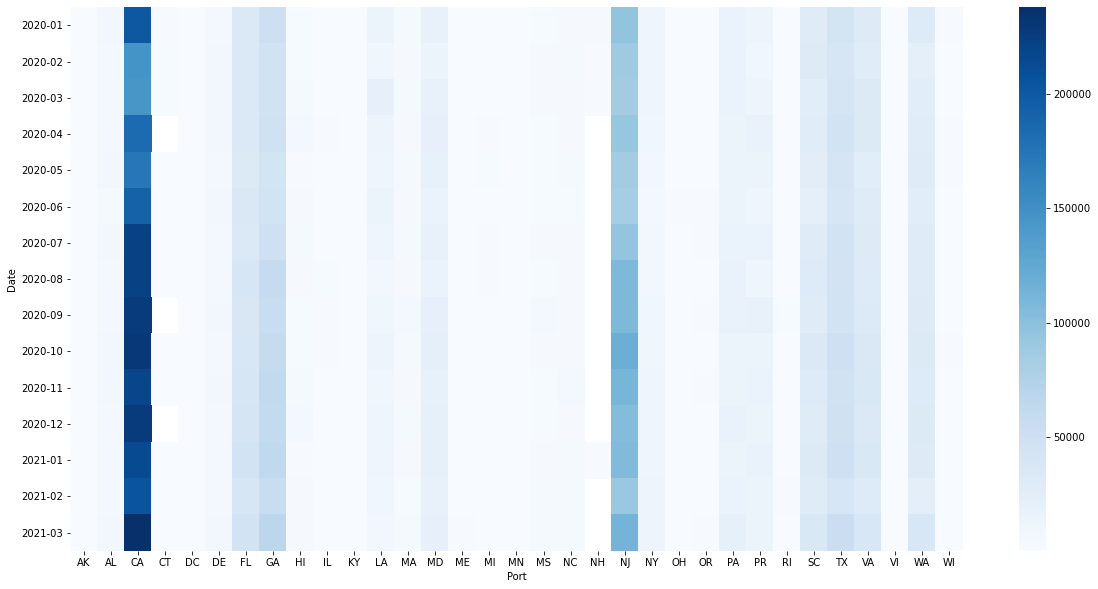

In [40]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(portTEUdf,cmap="Blues")
plt.show()

### Time Series International Trade: Monthly U.S. Imports by End-use Code <br>
The Census data API provides access to the most comprehensive set of data on current month and cumulative year-to-date imports using the End-use classification system. The End-use endpoint in the Census data API also provides value, shipping weight, and method of transportation totals at the district level for all U.S. trading partners.

In [ ]:
useVar = pd.read_html('https://api.census.gov/data/timeseries/intltrade/imports/enduse/variables.html')[0]
useVar

In [ ]:
useDict = dict(zip(useVar["Name"], useVar["Label"].str.replace('15-digit ', '')))

In [ ]:
useURL = 'https://api.census.gov/data/timeseries/intltrade/imports/enduse?get='
useURLreq = requests.get(f"{useURL}I_ENDUSE,I_ENDUSE_SDESC,DISTRICT,DIST_NAME,CNT_WGT_MO,CON_VAL_MO,CC_MO&time=from+2019+to+2021&key={key}")
print(useURLreq.url)

In [ ]:
useData = useURLreq.json()
useDF = pd.DataFrame(useData, columns=useData[0]).drop([0]).rename(columns=useDict)
pd.set_option('display.max_colwidth', None)
useDF

In [ ]:
useDF = useDF.rename(columns={'1- or 5-character Import ENDUSE Code':'code',"Containerized Vessel Shipping Weight":"Weight","Imports for Consumption, Total Value":"Value","ISO-8601 Date/Time value":"Date","100-character Import ENDUSE Short Description":"ENDUSE", '50-character District name': 'District'})
useDF

In [ ]:
enduse = useDF[(useDF.code =='0')|(useDF.code =='1')|(useDF.code =='2')|(useDF.code =='3')|(useDF.code =='4')|(useDF.code =='5')]
endusedata = enduse[~enduse['District'].str.contains("TOTAL")].drop(columns=['2-character District Code', 'code'])
endusedata

In [ ]:
endusedata = endusedata.rename(columns={'Card Count': 'Item_Count'})
endusedata

In [ ]:
endusedata = endusedata[(endusedata.Item_Count != "0")]
endusedata

In [ ]:
grendusedata = endusedata.pivot(index=["Date","District"], columns=['ENDUSE'], values=['Weight','Value','Item_Count'])
grendusedata

In [ ]:
endusedata.groupby(['District','ENDUSE','Date']).sum()

In [ ]:
grendusedata.to_json("./static/data/grendusedata.json", orient='index')

In [ ]:
grendusedata.to_csv("./static/data/grendusedata.csv")

In [ ]:
endusedata.to_csv("./static/data/endusedata.csv")

In [ ]:
endusedata.to_json("./static/data/endusedata.json")

### Total Consumption by Date, Product and Value

In [ ]:
enduseTOTAL = enduse[enduse['District'].str.contains("TOTAL")].drop(columns=['code','2-character District Code','Weight'])
enduseTOTAL = enduseTOTAL.drop(columns='District')
enduseTOTAL

In [ ]:
useTCOL = enduseTOTAL.columns.drop(['ENDUSE',"Date"])
enduseTOTAL[useTCOL] = enduseTOTAL[useTCOL].apply(pd.to_numeric, errors='coerce')
enduseTOTAL.info()

In [ ]:
valuePD = enduseTOTAL.pivot(index="Date", columns='ENDUSE', values='Value')
valuePD

In [ ]:
valuePD.describe()

In [ ]:
valuePD.plot(kind='bar', stacked=True, figsize=(20,10))
plt.legend(bbox_to_anchor =(0.84,1.1), ncol = 3)
plt.show()

In [ ]:
valuePD.to_csv("./static/data/valuePD.csv")

In [ ]:
valuePD.to_json("./static/data/valuePD.json")

In [ ]:
stateportTEU.to_json("./static/data/stateportTEU.json")